# FORMULA 1 RACE DATA


## 1. INTRODUCCIÓN

El caso Kaggle del cual dispongo se denomina FORMULA 1 RACE DATA. En el se encuentra información de la FORMULA 1  desde la temporada 1950 hasta la temporada 2017. Este Kaggle esta formado por varios datasets, en los cuales se puede encontrar datos de cada piloto, escuderia, resultados, etc. Aunque el caso Kaggle contenga exactamente 13 datasets, no todos seran utlitzados debido a la gran cantidad de datos que resultaria.

## 2. OBJETIVOS

Nada más ver el dataset que se me proporciono en lo primero que pensé es en intentar predecir algo relacionado con el piloto español más famoso de todos los tiempos en nuestro país, Fernando Alonso. Por lo que el trabajo girara entorno a él y en investigar y visualizar sus estadísticas a lo largo de todos estos años en la FORMULA 1. El objetivo principal de esta práctica es predecir los puntos que hara Alonso en su siguiente carrera en ciertos circuitos y para ello se necesitara varia información relacionada con sus resultados globales en los diferentes Gran Premios en los que ha participado. Además de esto, mientras se vaya avanzando, iré monstrando ciertos datos sobre la carrera de Fernando que me parezcan curiosos y que pueda obtener a partir de la información proporcionada por los diferentes datasets.

## 3. EDA (exploratory data analysis)

Primeramente añadiremos todas las librerias necesarias para realizar la práctica y cargaremos los datasets con más importancia para nuestra investigación los cuales son: results.csv, races.csv, constructors.csv y circuits.csv. En ellos podemos encontrar información relacionada con los resultados de todos los pilotos en todas las carreras. Cabe decir que el último de ellos ha sido modificado manualmente, para poder ser utilizado, a causa de errores en palabras originados por sus acentos. Más adelante se explicaran los diferentes atributos del dataset ya que este sufrira modificaciones respecto al original.

In [278]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from statistics import mean
from sklearn import svm 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '%.3f' % x)

def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

dataset = load_dataset('datasets/results.csv')
data = dataset.values

dataset2 = load_dataset('datasets/races.csv')
data2 = dataset2.values

dataset3 = load_dataset('datasets/constructors.csv')
data3 = dataset3.values

dataset4 = load_dataset('datasets/circuits.csv')
data4 = dataset4.values



Como en este caso, a diferencia de prácticas anteriores, tenemos varios datasets, realizaremos un join para asi unir todos ellos y tener todos los datos en un solo dataset. En este caso se han unido los datasets más relevantes anteriormente mencionados a través de distintos Ids.También se queria realizar un join con drivers.csv pero este causaba un error por lo que identificaremos a Fernando Alonso por su driverId el cual es 4.

In [279]:
inner_join_df1 = pd.merge(dataset, dataset2, on='raceId' , how='inner')
inner_join_df2 = pd.merge(inner_join_df1, dataset3, on='constructorId' , how='inner')
inner_join_df = pd.merge(inner_join_df2, dataset4, on='circuitId' , how='inner')
inner_join_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,url_y,Unnamed: 5,circuitRef,name,location,country,lat,lng,alt,url
0,1,18,1,1,22.000,1,1.000,1,1,10.000,...,http://en.wikipedia.org/wiki/McLaren,NaN,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144968.000,10.000,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,5,18,5,1,23.000,3,5.000,5,5,4.000,...,http://en.wikipedia.org/wiki/McLaren,NaN,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144968.000,10.000,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,370,36,4,1,1.000,2,2.000,2,2,8.000,...,http://en.wikipedia.org/wiki/McLaren,NaN,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144968.000,10.000,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,371,36,1,1,2.000,4,3.000,3,3,6.000,...,http://en.wikipedia.org/wiki/McLaren,NaN,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144968.000,10.000,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
4,788,55,8,1,3.000,4,2.000,2,2,8.000,...,http://en.wikipedia.org/wiki/McLaren,NaN,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144968.000,10.000,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23772,18286,755,541,170,4.000,21,NaN,R,21,0.000,...,http://en.wikipedia.org/wiki/Cooper_Car_Company,NaN,riverside,Riverside International Raceway,California,USA,33937.000,-117273.000,NaN,http://en.wikipedia.org/wiki/Riverside_Interna...
23773,18287,755,479,170,6.000,9,NaN,R,22,0.000,...,http://en.wikipedia.org/wiki/Cooper_Car_Company,NaN,riverside,Riverside International Raceway,California,USA,33937.000,-117273.000,NaN,http://en.wikipedia.org/wiki/Riverside_Interna...
23774,18278,755,548,105,20.000,22,13.000,13,13,0.000,...,http://en.wikipedia.org/wiki/Maserati,NaN,riverside,Riverside International Raceway,California,USA,33937.000,-117273.000,NaN,http://en.wikipedia.org/wiki/Riverside_Interna...
23775,18275,755,507,106,23.000,18,10.000,10,10,0.000,...,http://en.wikipedia.org/wiki/Scarab_(constructor),NaN,riverside,Riverside International Raceway,California,USA,33937.000,-117273.000,NaN,http://en.wikipedia.org/wiki/Riverside_Interna...


Una vez unidos los dos datasets, al solo necesitar los datos de Fernando Alonso, nos quedaremos con aquellas muestras con un driverId igual al de Fernando, es decir, 4.

In [280]:
datasetFernando = inner_join_df[inner_join_df.driverId == 4]
datasetFernando
dataFernando = datasetFernando.values

Una vez tenemos todas las muestras de las carreras de Fernando Alonso, eliminaremos ciertos artibutos los cuales no proporcionan ningún tipo de información útil para nuestros futuros estudios, como son: number, position, positionText, statusId, round, date, time_y, url_x, etc.
    

In [281]:
del(datasetFernando['number'])
del(datasetFernando['position'])
del(datasetFernando['positionText'])
del(datasetFernando['statusId'])
del(datasetFernando['round'])
del(datasetFernando['date'])
del(datasetFernando['time_y'])
del(datasetFernando['url_x'])
del(datasetFernando['url_y'])
del(datasetFernando['name_x'])
del(datasetFernando['rank'])
del(datasetFernando['time_x'])
del(datasetFernando['milliseconds'])
del(datasetFernando['nationality'])
del(datasetFernando['constructorRef'])
del(datasetFernando['resultId'])
del(datasetFernando['raceId'])
del(datasetFernando['driverId'])
del(datasetFernando['constructorId'])
del(datasetFernando['circuitRef'])
del(datasetFernando['location'])
del(datasetFernando['country'])
del(datasetFernando['lat'])
del(datasetFernando['lng'])
del(datasetFernando['alt'])
del(datasetFernando['url'])
datasetFernando = datasetFernando.drop(datasetFernando.columns[[10]], axis = 'columns')

datasetFernando

,grid,positionOrder,points,laps,fastestLap,fastestLapTime,fastestLapSpeed,year,circuitId,name_y,name
2,2,2,8.000,58,20.000,01:26.3,221.178,2007,1,McLaren,Albert Park Grand Prix Circuit
41,11,21,0.000,16,14.000,01:32.6,206.268,2016,1,McLaren,Albert Park Grand Prix Circuit
43,12,14,0.000,50,48.000,01:30.1,211.938,2017,1,McLaren,Albert Park Grand Prix Circuit
96,11,4,5.000,58,58.000,01:28.6,215.464,2008,1,Renault,Albert Park Grand Prix Circuit
100,3,1,10.000,57,49.000,01:26.2,221.499,2006,1,Renault,Albert Park Grand Prix Circuit
...,...,...,...,...,...,...,...,...,...,...,...
22732,14,6,8.000,52,52.000,01:40.3,209.799,2016,71,McLaren,Sochi Autodrom
22735,15,20,0.000,0,NaN,NaN,NaN,2017,71,McLaren,Sochi Autodrom
22756,7,6,8.000,53,53.000,01:42.2,206.038,2014,71,Ferrari,Sochi Autodrom
22812,13,19,0.000,42,27.000,01:49.1,198.08,2016,73,McLaren,Baku City Circuit


Ahora ya tenemos nuestro dataset definitivo para realizar esta práctica, el cual es el siguiente:

In [282]:
datasetFernando

,grid,positionOrder,points,laps,fastestLap,fastestLapTime,fastestLapSpeed,year,circuitId,name_y,name
2,2,2,8.000,58,20.000,01:26.3,221.178,2007,1,McLaren,Albert Park Grand Prix Circuit
41,11,21,0.000,16,14.000,01:32.6,206.268,2016,1,McLaren,Albert Park Grand Prix Circuit
43,12,14,0.000,50,48.000,01:30.1,211.938,2017,1,McLaren,Albert Park Grand Prix Circuit
96,11,4,5.000,58,58.000,01:28.6,215.464,2008,1,Renault,Albert Park Grand Prix Circuit
100,3,1,10.000,57,49.000,01:26.2,221.499,2006,1,Renault,Albert Park Grand Prix Circuit
...,...,...,...,...,...,...,...,...,...,...,...
22732,14,6,8.000,52,52.000,01:40.3,209.799,2016,71,McLaren,Sochi Autodrom
22735,15,20,0.000,0,NaN,NaN,NaN,2017,71,McLaren,Sochi Autodrom
22756,7,6,8.000,53,53.000,01:42.2,206.038,2014,71,Ferrari,Sochi Autodrom
22812,13,19,0.000,42,27.000,01:49.1,198.08,2016,73,McLaren,Baku City Circuit


Finalmente nuestro dataset contiene 293 muestras y 11 columnas. Los diferentes atributos son:
- grid: posición de parrilla/salida
- positionOrder: posición final o puesto en la carrera
- points: puntos obtenidos
- laps: vueltas
- fastestLap: vuelta en la cual se realizó la vuelta más rápida
- fastestLapTime: tiempo de vuelta rápida
- fastestLapSpeed: velocidad máxima alcanzada en la vuelta rápida
- year: año en el que ocurrió la carrera
- circuitId: Id del circuito
- name_y: escuderia
- name: nombre del circuito

A continuación, visualizaremos de que tipo son nuestros atributos.


In [283]:
print("Tipos de atributos")
datasetFernando.dtypes

Tipos de atributos


grid                 int64
positionOrder        int64
points             float64
laps                 int64
fastestLap         float64
fastestLapTime      object
fastestLapSpeed     object
year                 int64
circuitId            int64
name_y              object
name                object
dtype: object

Como podemos ver, todos los atributos son de tipo integer o float menos 4, estos 4 son fastestLapTime, fastestLapSpeed, name y name_y. Los dos primeros los vamos a pasar a tipo númerico ya que son atributos los cuales luego utilizaremos a la hora de predecir y por lo tanto se necesitan en tipo numérico. En cambio, name y name_y los dejaremos como string ya que solo seran útiles para visualizar ciertas gráficas en un futuro pero no para la predicción.

In [284]:
datasetFernando["fastestLapSpeed"] = pd.to_numeric(datasetFernando["fastestLapSpeed"])
datasetFernando

,grid,positionOrder,points,laps,fastestLap,fastestLapTime,fastestLapSpeed,year,circuitId,name_y,name
2,2,2,8.000,58,20.000,01:26.3,221.178,2007,1,McLaren,Albert Park Grand Prix Circuit
41,11,21,0.000,16,14.000,01:32.6,206.268,2016,1,McLaren,Albert Park Grand Prix Circuit
43,12,14,0.000,50,48.000,01:30.1,211.938,2017,1,McLaren,Albert Park Grand Prix Circuit
96,11,4,5.000,58,58.000,01:28.6,215.464,2008,1,Renault,Albert Park Grand Prix Circuit
100,3,1,10.000,57,49.000,01:26.2,221.499,2006,1,Renault,Albert Park Grand Prix Circuit
...,...,...,...,...,...,...,...,...,...,...,...
22732,14,6,8.000,52,52.000,01:40.3,209.799,2016,71,McLaren,Sochi Autodrom
22735,15,20,0.000,0,NaN,NaN,NaN,2017,71,McLaren,Sochi Autodrom
22756,7,6,8.000,53,53.000,01:42.2,206.038,2014,71,Ferrari,Sochi Autodrom
22812,13,19,0.000,42,27.000,01:49.1,198.080,2016,73,McLaren,Baku City Circuit


Para pasar fastestLapTime a númerico no bastara solo con la función to_numeric(). Primeramente tendremos que eliminar todos los valores nulos o datos sin información de la columna fastestLapTime ya que al tratarse de una columna formada por strings no podemos sustituir estos huecos por la mediana o otras métricas. Es verdad que este punto generalmente se haria en el apartado de Preprocessing pero es necesario hacerlo ya para este atributo ya que sino no podremos continuar.

In [285]:
datasetFernando = datasetFernando.dropna(subset=["fastestLapTime"])
datasetFernando

,grid,positionOrder,points,laps,fastestLap,fastestLapTime,fastestLapSpeed,year,circuitId,name_y,name
2,2,2,8.000,58,20.000,01:26.3,221.178,2007,1,McLaren,Albert Park Grand Prix Circuit
41,11,21,0.000,16,14.000,01:32.6,206.268,2016,1,McLaren,Albert Park Grand Prix Circuit
43,12,14,0.000,50,48.000,01:30.1,211.938,2017,1,McLaren,Albert Park Grand Prix Circuit
96,11,4,5.000,58,58.000,01:28.6,215.464,2008,1,Renault,Albert Park Grand Prix Circuit
100,3,1,10.000,57,49.000,01:26.2,221.499,2006,1,Renault,Albert Park Grand Prix Circuit
...,...,...,...,...,...,...,...,...,...,...,...
22731,19,11,0.000,53,29.000,01:42.6,205.115,2015,71,McLaren,Sochi Autodrom
22732,14,6,8.000,52,52.000,01:40.3,209.799,2016,71,McLaren,Sochi Autodrom
22756,7,6,8.000,53,53.000,01:42.2,206.038,2014,71,Ferrari,Sochi Autodrom
22812,13,19,0.000,42,27.000,01:49.1,198.080,2016,73,McLaren,Baku City Circuit


Una vez eliminados los valores nulos, pasaremos los minutos a segundos y asi tendremos la fastestLapTime en segundos y por lo tanto podremos transformala en un atributo de tipo numérico.

In [286]:
for i in range(248):
    s = datasetFernando['fastestLapTime'].iloc[i]
    sp = s.split(sep=':', maxsplit=3)
    fastestLapTime = float(sp[0])*60 + float(sp[1])
    datasetFernando['fastestLapTime'].iloc[i] = fastestLapTime

In [287]:
datasetFernando["fastestLapTime"] = pd.to_numeric(datasetFernando["fastestLapTime"])
datasetFernando

,grid,positionOrder,points,laps,fastestLap,fastestLapTime,fastestLapSpeed,year,circuitId,name_y,name
2,2,2,8.000,58,20.000,86.300,221.178,2007,1,McLaren,Albert Park Grand Prix Circuit
41,11,21,0.000,16,14.000,92.600,206.268,2016,1,McLaren,Albert Park Grand Prix Circuit
43,12,14,0.000,50,48.000,90.100,211.938,2017,1,McLaren,Albert Park Grand Prix Circuit
96,11,4,5.000,58,58.000,88.600,215.464,2008,1,Renault,Albert Park Grand Prix Circuit
100,3,1,10.000,57,49.000,86.200,221.499,2006,1,Renault,Albert Park Grand Prix Circuit
...,...,...,...,...,...,...,...,...,...,...,...
22731,19,11,0.000,53,29.000,102.600,205.115,2015,71,McLaren,Sochi Autodrom
22732,14,6,8.000,52,52.000,100.300,209.799,2016,71,McLaren,Sochi Autodrom
22756,7,6,8.000,53,53.000,102.200,206.038,2014,71,Ferrari,Sochi Autodrom
22812,13,19,0.000,42,27.000,109.100,198.080,2016,73,McLaren,Baku City Circuit


Finalmente, estos serian los tipos datos de nuestros atributos.

In [288]:
datasetFernando.dtypes

grid                 int64
positionOrder        int64
points             float64
laps                 int64
fastestLap         float64
fastestLapTime     float64
fastestLapSpeed    float64
year                 int64
circuitId            int64
name_y              object
name                object
dtype: object

A continuación, visualiaremos la correlació que existe entre los diversos atributos de nuestro dataset. 

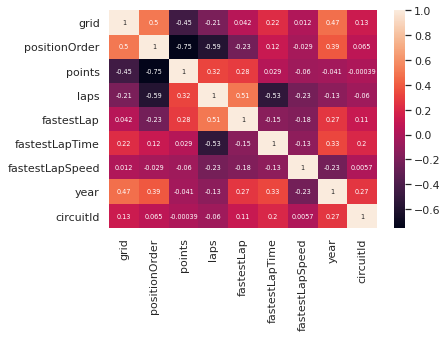

In [289]:
correlacio = datasetFernando.corr()
plt.figure()
ax = sns.heatmap(correlacio, annot=True, annot_kws={"size": 6.5})

Como nuestro atributo a predecir es la posición final de la carrera, nos fijaremos en el atributo positionOrder que justamente muestra esto. Como podemos observar, hay un atributo con una correlación positiva basante elevada el cual es grid. Tiene bastante sentido esta alta correlación ya que el grid, como antes se ha explicado, es la posición de salida. A parte de este, year y fastLapTime también tienen una correlación positiva notable y tendremos que tenerlos en cuenta para posibles predicciones. 
A su vez, laps y fastestLap tienen correlaciones negativas muy elevadas con positionOrder y aunque sean negativas debemos tenerlas en cuenta ya que pueden ayudar a la hora de predecir. 
También es verdad que el atributo points tiene una alta correlación negativa pero como este atributo justamente viene determinado por la positionOrder (posición final) no podemos utilizarla en predicciones. Basicamente, tu sabes los puntos que harás dependiendo de tu posición final, por lo que no podemos utilizar el atributo points para predecir.

A continuación, visualizaremos algunas estadísticas a lo largo de la carrera de Fernando Alonso. 

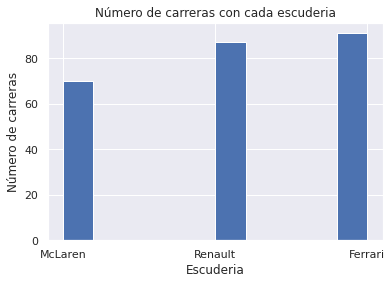

In [290]:
escuderia = datasetFernando['name_y']
plt.figure()
plt.title("Número de carreras con cada escuderia")
plt.xlabel("Escuderia")
plt.ylabel("Número de carreras")
hist = plt.hist(escuderia,10)

Como podemos observar, Fernando Alonso desde el inicio de su carrera hasta 2017 ha pilotado para 3 escuderias: McLaren, Renault y Ferrari.

<Figure size 432x288 with 0 Axes>

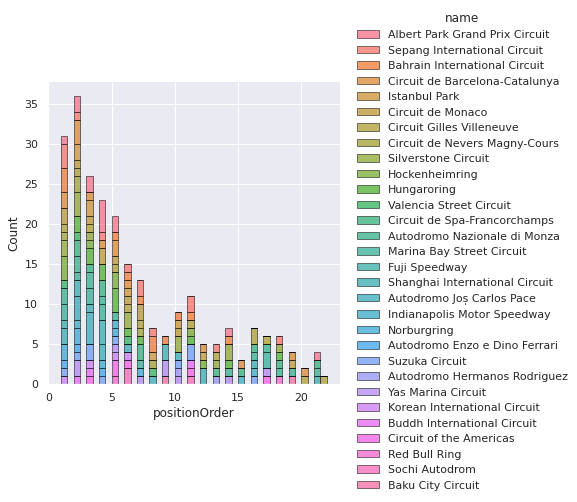

In [291]:
plt.figure()
sns.displot(datasetFernando, x='positionOrder', hue='name',binwidth=0.5,multiple="stack", edgecolor='black', 
linewidth=0.5)
plt.show()

En esta gráfica podemos observar como la mayoria de resultados de Fernando Alonso en sus carreras han sido entre la primera y la quinta posisción, siendo la segunda posición la que más veces ha obtenido. En la siguiente gráfica veremos que circuitos son los que más veces ha visitado Fernando.

<Figure size 432x288 with 0 Axes>

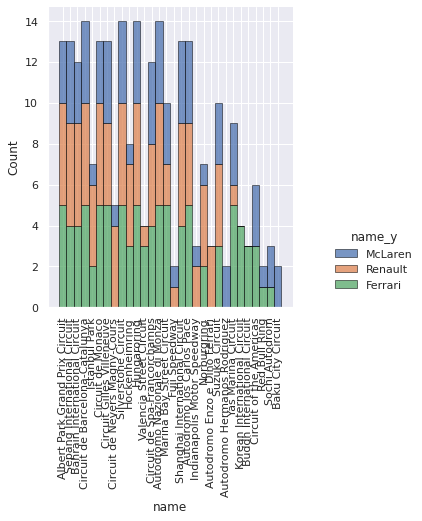

In [292]:
plt.figure()
dis = sns.displot(datasetFernando, x='name', hue='name_y',binwidth=50,multiple="stack", edgecolor='black', 
linewidth=0.5)
dis.set_xticklabels(rotation=90)
plt.show()


Podemos observar que en 4 distintos circuitos ha disputado 14 carreras desde el inicio de su carrera hasta 2017. Estos 4 circuitos son los de: Catalunya, Silverstone, Hungaroring y Monza. 
Y ha disputado 13 carreras en circuitos como los de: Sepang, Shangai, Albert Park, Monaco, Guilles y Carlos Pace.
Ya que hemos visualizado también las distintas escuderias a las cuales ha pertenecido, en la siguiente gráfica comprobaremos los resultados obtenidos con cada una de ellas.

<Figure size 432x288 with 0 Axes>

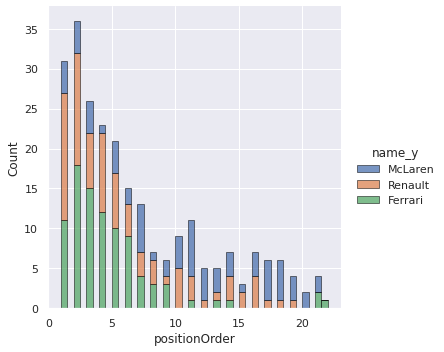

In [293]:
plt.figure()
dis = sns.displot(datasetFernando, x='positionOrder', hue='name_y',binwidth=0.5,multiple="stack", edgecolor='black', 
linewidth=0.5)
plt.show()

Si observamos la gráfica, podemos ver como los mejores resultados los ha obtenido cuando pilotaba para Renault o para Ferrari y con McLaren fue muy irregular y tanto podia quedar de los primeros como de los últimos

A continuación miraremos los puntos los cuales ha obtenido Fernando Alonso en su carrera. Tenemos que tener en cuenta que en el año 2009 fue la última temporada donde solo puntuaban hasta el octavo y donde el ganador recibía 10 puntos. Desde entonces, acabar en el top 10 de una carrera de F1 supone puntos y una victoria te da nada menos que 25.

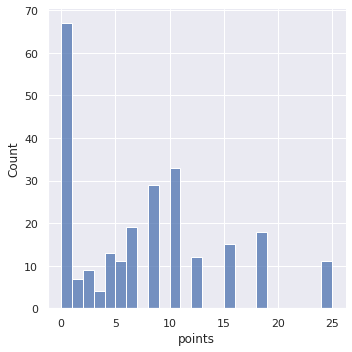

In [294]:
sns.displot(datasetFernando['points'], binwidth=1, multiple="stack")
plt.show()

Como podemos observar muchas veces ha obtenido 0 puntos, esto debido a que quedo por debajo de la octava posición, antes de la modificación de reglamento antes explicada, o por debajo de la decima posisición, después de la modificación de reglamento explicada.
Anteriormente hemos visto que quedo muchas veces en el podio pero viendo esta gráfica podemos ver como fue la mayoria de veces antes del 2009 ya que puntuaciones de 10, 8 y 6 las cuales correspoden a hacer podio antes de 2009 son más abundantes que puntuaciones de 25, 18 y 15 las cuales corresponden a hacer podio despues de 2009. 

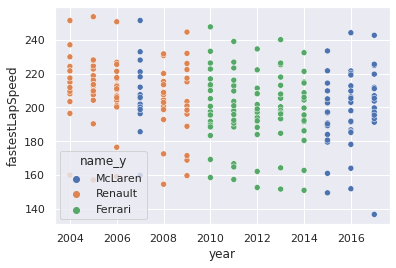

In [295]:
sns.set_theme()
sns.scatterplot(data=datasetFernando, x='year',y='fastestLapSpeed', hue='name_y' )
plt.show()

Podemos observar que las máximas velocidades las cuales ha alcanzado Fernando Alonso fueron entre 2004 y 2007. Esto puede ser un claro indicio de como a medida que han pasado los años los coches han ido sufriendo cambios para que la competición sea más igualada y se contamine menos y estos cambios han ralentizado los coches. Cabe decir que la velocidad de ellos tampoco ha decrementado de una manera increible pero hay un leve cambio. También tiene que ver bastante la escuderia a la cual pertenecia en ese momento y como podemos ver con Renault ha sido donde mayoritariamente ha conseguido mejores velocidades.



     


## 4. Preprocessing

Empezaremos este primer apartado comprobando si existen muchos datos sin información en nuestro dataset.

In [296]:
datasetFernando.isnull().sum()

grid               0
positionOrder      0
points             0
laps               0
fastestLap         0
fastestLapTime     0
fastestLapSpeed    0
year               0
circuitId          0
name_y             0
name               0
dtype: int64

Como podemos observar, no existen datos nulos. Esto es debido a que anteriormente ya hemos tenido que eliminar algunos valores nulos para poder pasar el atributo fastestLapTime a numérico y respecto a los demas atributos, podemos observar como tampoco tienen valores nulos por lo que no modificaremos nada.

A continuación comprobaremos si nuestra base de datos contiene valores extremos o anormales los cuales pueden afectar a la predicción.

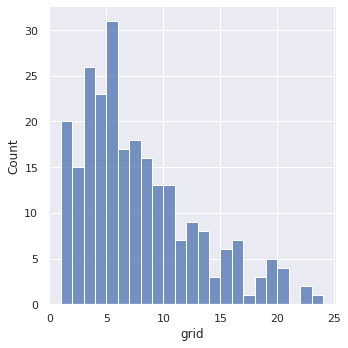

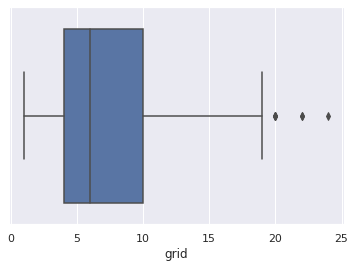

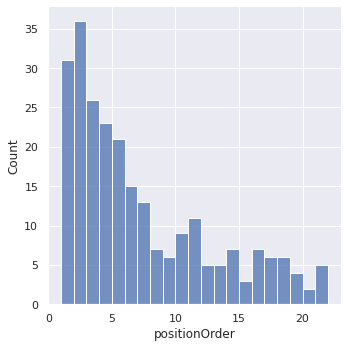

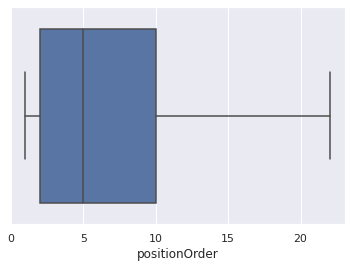

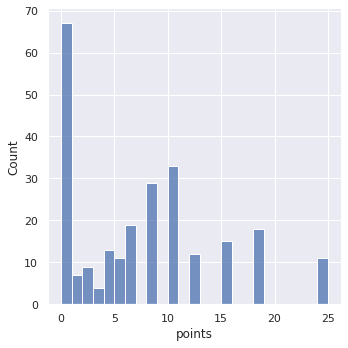

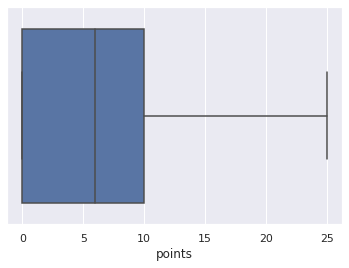

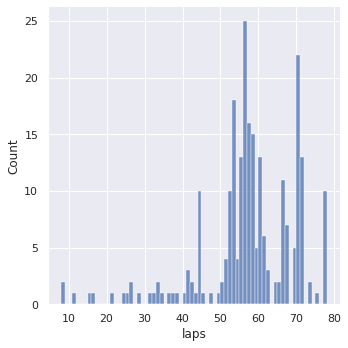

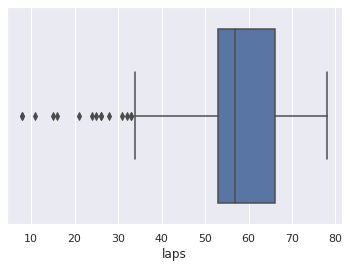

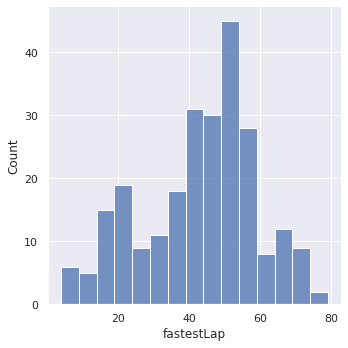

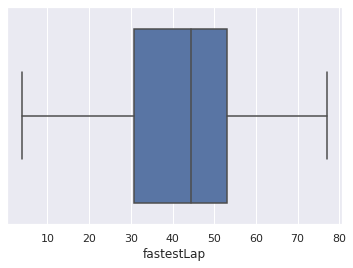

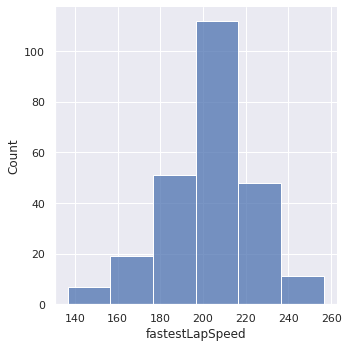

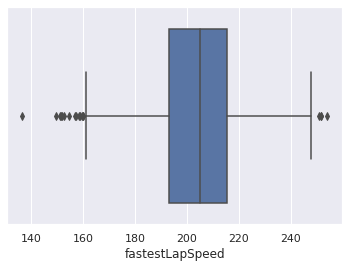

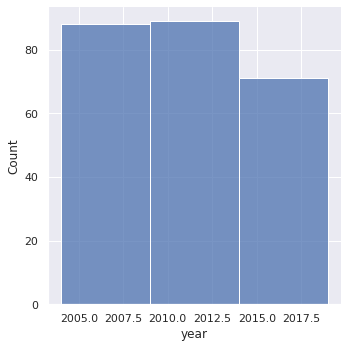

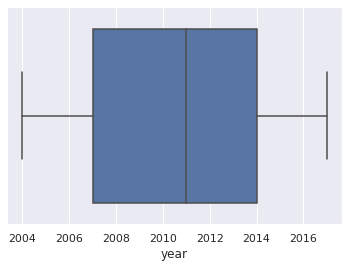

In [297]:
sns.displot(datasetFernando['grid'], binwidth=1, multiple="stack")
plt.show()
sns.boxplot(datasetFernando['grid'])
plt.show()

sns.displot(datasetFernando['positionOrder'], binwidth=1, multiple="stack")
plt.show()
sns.boxplot(datasetFernando['positionOrder'])
plt.show()

sns.displot(datasetFernando['points'], binwidth=1, multiple="stack")
plt.show()
sns.boxplot(datasetFernando['points'])
plt.show()

sns.displot(datasetFernando['laps'], binwidth=1, multiple="stack")
plt.show()
sns.boxplot(datasetFernando['laps'])
plt.show()

sns.displot(datasetFernando['fastestLap'], binwidth=5, multiple="stack")
plt.show()
sns.boxplot(datasetFernando['fastestLap'])
plt.show()

#sns.displot(datasetFernando['fastestLapTime'], binwidth=25, multiple="stack")
#plt.show()
#sns.boxplot(datasetFernando['fastestLapTime'])
#plt.show()

sns.displot(datasetFernando['fastestLapSpeed'], binwidth=20, multiple="stack")
plt.show()
sns.boxplot(datasetFernando['fastestLapSpeed'])
plt.show()


sns.displot(datasetFernando['year'], binwidth=5, multiple="stack")
plt.show()
sns.boxplot(datasetFernando['year'])
plt.show()



Como podemos observar, no hay ningún valor fuera de lo normal o extremo por lo que no eliminaremos ninguna muestra. También podemos observar como no hay ningún atributo donde se vea claramente una distribución normal. 

Para evitar posibles casos de inexactitud de datos y/o inefiencia de operaciones vamos a normalizar nuestros datos. Como únicamente se pueden normalizar datos númericos, los atributos los cuales anteriormente no fueron eliminados porque eran strings útiles para ciertas gráficas ahora pueden ser eliminados.
En nuestro caso utilizaremos la Standarization, con este proceso conseguiremos optimizar el aprendizaje del modelo de tal manera que todos los atributos de entrada estarán dentro de la misma escala y por lo tanto no habrán atributos que tengan un peso más elevado que otros solo por la escala de sus datos.

A su vez, como queremos predecir el resultado en algunas de sus carreras seleccionaremos las muestras de las carreras que más veces ha visitado, los cuales hemos visto anteriormente que eran:  Sepang, Catalunya, Silverstone, Hungaroring, Monza, Autodromo Carlos Pace, Shangai, Albert Park, Monaco y Guilles.



In [298]:
datasetFernando = datasetFernando[(datasetFernando['name'] == 'Sepang International Circuit') 
                                  | (datasetFernando['name'] == 'Circuit de Barcelona-Catalunya') | 
                                  (datasetFernando['name'] == 'Silverstone Circuit') | 
                                  (datasetFernando['name'] == 'Hungaroring') | 
                                  (datasetFernando['name'] == 'Autodromo Nazionale di Monza') | 
                                  (datasetFernando['name'] == 'Autodromo Jos̩ Carlos Pace') | 
                                  (datasetFernando['name'] == 'Albert Park Grand Prix Circuit') | 
                                  (datasetFernando['name'] == 'Circuit de Monaco') | 
                                  (datasetFernando['name'] == 'Circuit Gilles Villeneuve') | 
                                  (datasetFernando['name'] == 'Shanghai International Circuit')]
datasetFernando

,grid,positionOrder,points,laps,fastestLap,fastestLapTime,fastestLapSpeed,year,circuitId,name_y,name
2,2,2,8.000,58,20.000,86.300,221.178,2007,1,McLaren,Albert Park Grand Prix Circuit
41,11,21,0.000,16,14.000,92.600,206.268,2016,1,McLaren,Albert Park Grand Prix Circuit
43,12,14,0.000,50,48.000,90.100,211.938,2017,1,McLaren,Albert Park Grand Prix Circuit
96,11,4,5.000,58,58.000,88.600,215.464,2008,1,Renault,Albert Park Grand Prix Circuit
100,3,1,10.000,57,49.000,86.200,221.499,2006,1,Renault,Albert Park Grand Prix Circuit
...,...,...,...,...,...,...,...,...,...,...,...
11584,5,3,15.000,71,67.000,73.900,210.038,2010,18,Ferrari,Autodromo Jos̩ Carlos Pace
11586,5,4,12.000,71,65.000,76.200,203.625,2011,18,Ferrari,Autodromo Jos̩ Carlos Pace
11588,7,2,18.000,71,36.000,78.600,197.301,2012,18,Ferrari,Autodromo Jos̩ Carlos Pace
11590,3,3,15.000,71,50.000,75.500,205.473,2013,18,Ferrari,Autodromo Jos̩ Carlos Pace


In [299]:
del(datasetFernando['name'])
del(datasetFernando['name_y'])

scaler = StandardScaler()
standarFernando = scaler.fit_transform(datasetFernando)
standFernando = pd.DataFrame(standarFernando, columns=datasetFernando.columns)

standFernando


,grid,positionOrder,points,laps,fastestLap,fastestLapTime,fastestLapSpeed,year,circuitId
0,-0.979,-0.860,0.126,-0.046,-1.356,-0.011,0.777,-0.843,-1.401
1,0.762,2.398,-1.073,-3.253,-1.706,0.688,0.137,1.377,-1.401
2,0.956,1.198,-1.073,-0.656,0.278,0.411,0.380,1.624,-1.401
3,0.762,-0.517,-0.323,-0.046,0.861,0.244,0.532,-0.597,-1.401
4,-0.785,-1.031,0.426,-0.122,0.336,-0.022,0.791,-1.090,-1.401
...,...,...,...,...,...,...,...,...,...
129,-0.398,-0.688,1.176,0.947,1.386,-1.387,0.299,-0.103,1.607
130,-0.398,-0.517,0.726,0.947,1.270,-1.132,0.023,0.144,1.607
131,-0.012,-0.860,1.625,0.947,-0.422,-0.866,-0.249,0.390,1.607
132,-0.785,-0.688,1.176,0.947,0.395,-1.210,0.103,0.637,1.607


## 5. Model Selection

Para esta práctica se han considerado 2 modelos distintos:
- Regresión lineal univariable:  Este es el modelo más simple de regresión lineal. Solo utilizaremos el atributo de correlación como atributo de entrada. 
- Regresión lineal multivariable: Este es un modelo de regresión lineal más complejo ya que no solo tiene un atributo como entrada sino varios de ellos.

## 6. Cross-validation

En esta práctica el método seleccionado para realizar Cross-validation ha sido cross-validation k-fold ya que es el método mas completo de todos y porque los demás pueden ocasionar algunos errores a la hora de dividir el dataset para el entrenamiento y validación. 
Pero antes de continuar debemos seleccionar el valor más adecuado de K para obtener los mejores resultados posibles.

In [300]:
folds = range(2,15)

def evaluatemodel(cv, standar):
    
    x = standar[['grid']]
    y = standar[['positionOrder']]
    lab = preprocessing.LabelEncoder()
    y_transformed = lab.fit_transform(y)
    
    Reg = LinearRegression()
    scores = cross_val_score(Reg, x, y_transformed, cv=cv, n_jobs=-1)
    return mean(scores), scores.min(), scores.max()

for k in folds:
    cv = KFold(n_splits=k, shuffle=True, random_state=10)
    k_mean, k_min, k_max = evaluatemodel(cv, standFernando)
    print('-> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))

-> folds=2, accuracy=0.189 (0.186,0.193)
-> folds=3, accuracy=0.228 (0.197,0.261)
-> folds=4, accuracy=0.207 (0.135,0.315)
-> folds=5, accuracy=0.179 (0.093,0.291)
-> folds=6, accuracy=0.167 (-0.012,0.435)
-> folds=7, accuracy=0.005 (-0.980,0.280)
-> folds=8, accuracy=0.190 (-0.000,0.374)
-> folds=9, accuracy=0.100 (-0.786,0.549)
-> folds=10, accuracy=-0.127 (-2.437,0.355)
-> folds=11, accuracy=0.118 (-0.720,0.531)
-> folds=12, accuracy=-0.025 (-2.506,0.584)
-> folds=13, accuracy=0.153 (-0.416,0.726)
-> folds=14, accuracy=-0.025 (-2.299,0.728)


Como podemos observar la mayor accuracy se obtiene con una K igual a 3, por lo tanto sera el valor que utilizaremos.

## 7. Metric Analysis

Ahora ya visualizaremos los resultados de nuestros dos modelos seleccionados. Para visualizar los resultados y compararlos entre si, guardaremos los resultados en diccionarios y crearemos una tabla con ellos.

In [301]:
resultados_de_los_modelos = {'Modelo' : [], 'Score' : [], 'KFold Score' : [], 'MSE' : []}
resultados_de_los_modelos = pd.DataFrame(data=resultados_de_los_modelos)
columns = ['Modelo', 'Score','KFold Score','MSE']

Como podemos observar, para comparar los resultados de los distintos modelos utilizamos las metricas Score, R2_Score, KFold Score y MSE.
- Score: precisión del modelo o refleja la bondad del ajuste de un modelo a la variable que pretende predecir. Cuanto más cerca de 1, mejor resultado.
- KFold Score: precisión al utilizar un KFold determinado.
- MSE: Error quadrático medio, cuanto más pequeño mejor resultado ya que representa la diferencia entre el resultado obtenido y el esperado.



Para más adelante poder visualizar la regresión multivariada, crearemos una función utilizando PCA.

In [302]:
from sklearn.decomposition import PCA
def plot_predictions(model, X, Y, X2=np.array([])):
    pca = PCA(n_components=1)
    x_pca = pca.fit_transform(X)
    
    if X2.shape[0] > 0:
        x_pca2 = pca.fit_transform(X2)
        pred = model.predict(X2)
        x_aux = np.sort(x_pca2, axis=None)
    else:    
        pred = model.predict(X)
        x_aux = np.sort(x_pca, axis=None)
        
    pred = np.sort(pred, axis=None)
 
    x_aux = np.sort(x_pca, axis=None)
    plt.figure()
    plt.ylabel('positionOrder')
    plt.xlabel('Inputs')
    plt.scatter(x_pca, Y, color='tab:blue')
    plt.plot(x_aux, pred, color='chocolate')
 
    plt.show()


### Regresion lineal univariable

Como ya se ha mencionado anteriormente, nosotros queremos predecir la posición final de la carrera, por lo que nuestro atributo a predecir sera positionOrder y nuestro predictor sera grid ya que es el atributo con mas correlación positiva a positionOrder. Al tratarse de una regresión lineal univariable, el predictor solo puede ser un atributo, cosa la cual cambiara en la multivariable.

REGRESION LINEAL UNIVARIABLE


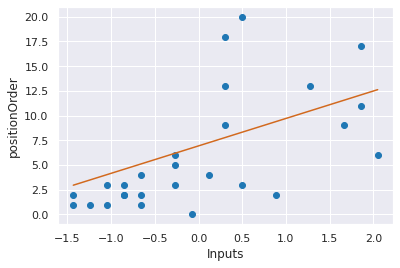

In [303]:
k = 3
x = standFernando[['grid']]
y = standFernando[['positionOrder']]

lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y_transformed, test_size=0.20, random_state=30)
print("REGRESION LINEAL UNIVARIABLE")

lin_reg = LinearRegression() 
lin_reg.fit(x_train, y_train) 

resultados_de_los_modelos = resultados_de_los_modelos.append({'Modelo' : 'Regresión lineal univariable',
                                    'Score': lin_reg.score(x_test, y_test),
                                    'KFold Score' : np.mean(cross_val_score(lin_reg, x, y, cv=k)),
                                    'MSE' : mean_squared_error(lin_reg.predict(x_test), y_test)},ignore_index=True)

plot_predictions(lin_reg, x_test, y_test)


In [304]:
resultados_de_los_modelos

,Modelo,Score,KFold Score,MSE
0,Regresión lineal univariable,0.344,0.157,20.966


Como podemos observar, la regresión lineal univariable da muy malos resultados. Los scores generales son bastante inferiores a lo deseado y el MSE es un valor muy elevado, cual cosa significa que el modelo no hace correctamente su función predictiva. Estos valores eran de esperar ya que simplemente con la posición inicial/parrilla es muy dificil predecir como quedara Fernando Alonso al final de la carrera. Veremos si esto cambia cuando entren en juego más atributos.

### Regresion lineal multivariable

En este caso el predictor estara compuesto por más de un atributo. Primero probaremos con 3: grid, fastestLapTime y year. Year lo incorporaremos porque aunque no sea un dato continuo como fastestLapTime, este tiene influencia en factores como la experiencia, la edad o incluso de los avances tecnologicos respecto a los coches ya que cada año hay retoques en ellos y no es lo mismo un coche del 2000 que uno del 2007. Estos 3 atributos son los atributos con mayor correlación positiva respecto a positionOrder.

REGRESION LINEAL MULTIVARIABLE 



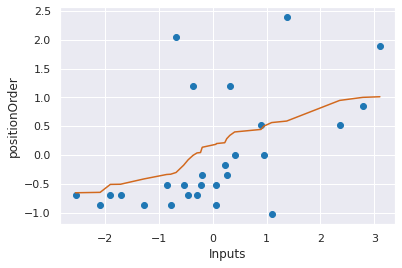

In [305]:
k = 3
x = standFernando[['grid','fastestLapTime','year']]
y = standFernando[['positionOrder']]

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.20, random_state=30)
print("REGRESION LINEAL MULTIVARIABLE", "\n")

lin_reg = LinearRegression() 
lin_reg.fit(x_train, y_train) 

resultados_de_los_modelos = resultados_de_los_modelos.append({'Modelo' : 'Regresión lineal multivariable con 3 atributos',
                                    'Score': lin_reg.score(x_test, y_test),
                                    'KFold Score' : np.mean(cross_val_score(lin_reg, x, y, cv=k)),
                                    'MSE' : mean_squared_error(lin_reg.predict(x_test), y_test)},ignore_index=True)

plot_predictions(lin_reg, x_test, y_test)

In [306]:
resultados_de_los_modelos

,Modelo,Score,KFold Score,MSE
0,Regresión lineal univariable,0.344,0.157,20.966
1,Regresión lineal multivariable con 3 atributos,0.369,0.140,0.593


Podemos observar como en este modelo la precisión de KFold es peor que en el anterior pero en general el modelo es mejor porque la precisión del modelo ha mejorado y porque el MSE se ha reducido drásticamente . Esto quiere decir que en este modelo el resultado obtenido/predicho se aproxima más al resultado esperado y por lo tanto hay un menor error. 
Viendo estos resultados podemos suponer que cuanta más información útil tenga el modelo mejores resultados conseguira. Por lo tanto, vamos a ir probando que predictores más se le pueden añadir para mejorar estos resultados y encontrar el mejor modelo.

Ahora probaremos con 4 atributos como predictor, los 3 utilizados en el modelo anterior y uno extra, el atributo laps. Seleccionamos este atributo debido a su gran correlación negativa con el atributo a predecir. 

REGRESION LINEAL MULTIVARIABLE 



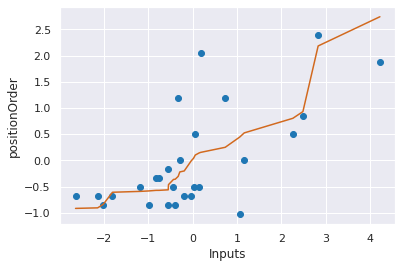

In [307]:
k = 3
x = standFernando[['grid','fastestLapTime','year', 'laps']]
y = standFernando[['positionOrder']]

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.20, random_state=30)
print("REGRESION LINEAL MULTIVARIABLE", "\n")

lin_reg = LinearRegression() 
lin_reg.fit(x_train, y_train) 

resultados_de_los_modelos = resultados_de_los_modelos.append({'Modelo' : 'Regresión lineal multivariable con 4 atributos',
                                    'Score': lin_reg.score(x_test, y_test),
                                    'KFold Score' : np.mean(cross_val_score(lin_reg, x, y, cv=k)),
                                    'MSE' : mean_squared_error(lin_reg.predict(x_test), y_test)},ignore_index=True)

plot_predictions(lin_reg, x_test, y_test)

In [308]:
resultados_de_los_modelos

,Modelo,Score,KFold Score,MSE
0,Regresión lineal univariable,0.344,0.157,20.966
1,Regresión lineal multivariable con 3 atributos,0.369,0.140,0.593
2,Regresión lineal multivariable con 4 atributos,0.747,0.574,0.238


Podemos observar como el modelo ha mejorado notablemente comparado a cuando se utilizaban solo 3 atributos como predictor. Tanto la precisión global del modelo como la precisión del KFold aumentan de una manera notable y el MSE disminuye aun más indicando que cada vez el valor predicho/obtenido se aproxima más al esperado. 
Como hemos dicho anteriormente, este atributo laps tiene una alta correlación negativa con el atributo a predecir. Justamente gracias a esta alta correlación el atributo laps proporciona una gran cantidad de información útil para el modelo y permite que haga un trabajo mucho más exacto y certero.
Aun asi, aunque estos resultados no son malos del todo, para un modelo de predicción lo ideal seria superar el 0.8 de precisión e incluso llegar a un 0.9 por lo que probaremos a añadir más atributos para ver si podemos lograr alguno de estos resultados. 

A continuación probaremos a añadir al predictor el siguiente atributo con una mayor correlación, da igual que sea positiva o negativa. Este atributo es fastestLap. 

REGRESION LINEAL MULTIVARIABLE 



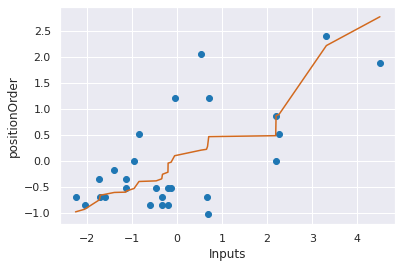

In [309]:
k = 3
x = standFernando[['grid','fastestLapTime','year', 'laps', 'fastestLap']]
y = standFernando[['positionOrder']]

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.20, random_state=30)
print("REGRESION LINEAL MULTIVARIABLE", "\n")

lin_reg = LinearRegression() 
lin_reg.fit(x_train, y_train) 

resultados_de_los_modelos = resultados_de_los_modelos.append({'Modelo' : 'Regresión lineal multivariable con 5 atributos',
                                    'Score': lin_reg.score(x_test, y_test),
                                    'KFold Score' : np.mean(cross_val_score(lin_reg, x, y, cv=k)),
                                    'MSE' : mean_squared_error(lin_reg.predict(x_test), y_test)},ignore_index=True)

plot_predictions(lin_reg, x_test, y_test)

In [310]:
resultados_de_los_modelos

,Modelo,Score,KFold Score,MSE
0,Regresión lineal univariable,0.344,0.157,20.966
1,Regresión lineal multivariable con 3 atributos,0.369,0.140,0.593
2,Regresión lineal multivariable con 4 atributos,0.747,0.574,0.238
3,Regresión lineal multivariable con 5 atributos,0.738,0.570,0.246


a

a

REGRESION LINEAL MULTIVARIABLE 



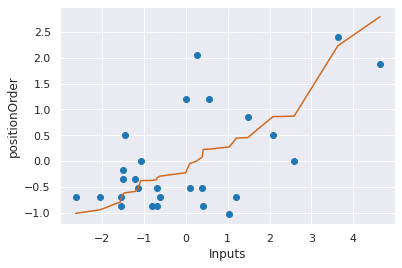

In [311]:
k = 3
x = standFernando[['grid','fastestLapTime','year', 'laps', 'fastestLap', 'circuitId']]
y = standFernando[['positionOrder']]

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.20, random_state=30)
print("REGRESION LINEAL MULTIVARIABLE", "\n")

lin_reg = LinearRegression() 
lin_reg.fit(x_train, y_train) 

resultados_de_los_modelos = resultados_de_los_modelos.append({'Modelo' : 'Regresión lineal multivariable con 6 atributos',
                                    'Score': lin_reg.score(x_test, y_test),
                                    'KFold Score' : np.mean(cross_val_score(lin_reg, x, y, cv=k)),
                                    'MSE' : mean_squared_error(lin_reg.predict(x_test), y_test)},ignore_index=True)

plot_predictions(lin_reg, x_test, y_test)

In [312]:
resultados_de_los_modelos

,Modelo,Score,KFold Score,MSE
0,Regresión lineal univariable,0.344,0.157,20.966
1,Regresión lineal multivariable con 3 atributos,0.369,0.140,0.593
2,Regresión lineal multivariable con 4 atributos,0.747,0.574,0.238
3,Regresión lineal multivariable con 5 atributos,0.738,0.570,0.246
4,Regresión lineal multivariable con 6 atributos,0.726,0.464,0.258


REGRESION LINEAL MULTIVARIABLE 



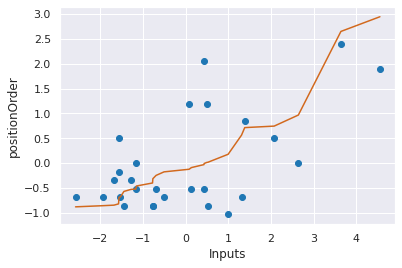

In [313]:
k = 3
x = standFernando[['grid','fastestLapTime','year', 'laps', 'fastestLap','circuitId','fastestLapSpeed']]
y = standFernando[['positionOrder']]

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.20, random_state=30)
print("REGRESION LINEAL MULTIVARIABLE", "\n")

lin_reg = LinearRegression() 
lin_reg.fit(x_train, y_train) 

resultados_de_los_modelos = resultados_de_los_modelos.append({'Modelo' : 'Regresión lineal multivariable con 7 atributos',
                                    'Score': lin_reg.score(x_test, y_test),
                                    'KFold Score' : np.mean(cross_val_score(lin_reg, x, y, cv=k)),
                                    'MSE' : mean_squared_error(lin_reg.predict(x_test), y_test)},ignore_index=True)

plot_predictions(lin_reg, x_test, y_test)

In [314]:
resultados_de_los_modelos

,Modelo,Score,KFold Score,MSE
0,Regresión lineal univariable,0.344,0.157,20.966
1,Regresión lineal multivariable con 3 atributos,0.369,0.140,0.593
2,Regresión lineal multivariable con 4 atributos,0.747,0.574,0.238
3,Regresión lineal multivariable con 5 atributos,0.738,0.570,0.246
4,Regresión lineal multivariable con 6 atributos,0.726,0.464,0.258
5,Regresión lineal multivariable con 7 atributos,0.737,0.625,0.247
